# Preparing the data for Machine Learning Algorithms

I this notebook Im gonna implement some ANN to predict the values of corrosion current $I$ and corrosion current $E$ for a given molecular compositions of compounds having Magnesium.

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.12.0


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
dataset = pd.read_pickle(("/content/gdrive/MyDrive/Colab Notebooks/data_processed.pkl"))

In [ ]:
dataset[dataset['E'] > 0]

,Al,Zn,Mn,Si,Fe,Ca,Sn,I,E
103,0,3.98,0.0,0.0,0,0,0.0,0.000022,1.53


In [ ]:
dataset = dataset.drop(labels=[103], axis=0)
dataset

,Al,Zn,Mn,Si,Fe,Ca,Sn,I,E
0,4.24,0.00,0.36,0.05,0,0,0.00,0.000224,-1.4600
1,4.3,0.00,0.36,0.00,0,0.17,0.00,0.000039,-1.5900
2,4.42,0.00,0.37,0.00,0,0.75,0.00,0.000046,-1.5800
3,4.42,0.00,0.36,0.00,0,1.58,0.00,0.000038,-1.6200
4,4.39,0.00,0.35,0.00,0,3.69,0.00,0.000258,-1.4800
...,...,...,...,...,...,...,...,...,...
159,3.52,5.02,0.00,0.00,0,0,0.00,0.000067,-1.5173
160,3.5,5.00,0.00,0.00,0,0,0.51,0.000009,-1.3628
161,3.56,5.01,0.00,0.00,0,0,1.03,0.000007,-1.3309
162,3.51,5.00,0.00,0.00,0,0,2.00,0.000011,-1.4235


In [ ]:
dataset["Al"] = pd.to_numeric(dataset["Al"])
dataset["Zn"] = pd.to_numeric(dataset["Zn"])
dataset["Mn"] = pd.to_numeric(dataset["Mn"])
dataset["Si"] = pd.to_numeric(dataset["Si"])
dataset["Fe"] = pd.to_numeric(dataset["Fe"])
dataset["Ca"] = pd.to_numeric(dataset["Ca"])
dataset["Sn"] = pd.to_numeric(dataset["Sn"])
dataset["I"] = pd.to_numeric(dataset["I"])
dataset["E"] = pd.to_numeric(dataset["E"])

In [ ]:
dataset.dtypes

Al    float64
Zn    float64
Mn    float64
Si    float64
Fe    float64
Ca    float64
Sn    float64
I     float64
E     float64
dtype: object

# Split the data into training and test sets

Now, split the dataset into a training set and a test set. You will use the test set in the final evaluation of your models.



In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [ ]:
train_dataset

,Al,Zn,Mn,Si,Fe,Ca,Sn,I,E
7,0.960,0.8900,0.000,0.000,0.000,2.0900,7.95,0.000177,-1.5540
46,0.058,0.5100,0.070,0.000,0.000,0.2200,0.00,0.000259,-1.8090
116,0.000,3.0000,0.500,0.000,0.000,0.2000,0.00,0.000032,-1.5090
123,12.700,0.0000,0.000,0.000,0.000,0.0000,0.00,0.000086,-1.4720
65,8.800,0.0000,0.033,0.000,0.013,1.5400,0.00,0.000081,-1.4950
...,...,...,...,...,...,...,...,...,...
57,0.000,4.0209,0.000,0.000,0.000,1.4101,0.00,0.000130,-1.5000
117,0.000,3.0000,0.700,0.000,0.000,0.2000,0.00,0.000048,-1.5560
77,0.027,4.2100,0.037,0.028,0.007,0.4000,0.00,0.000318,-1.7477
37,0.000,2.0600,0.010,0.010,0.010,0.3400,0.00,0.000327,-1.8200


# Inspect the data

Review the joint distribution of a few pairs of columns from the training set.

The top row suggests that the corrosion energy ($E_{corr}$) is a function of all the other parameters. The other rows indicate they are functions of each other.

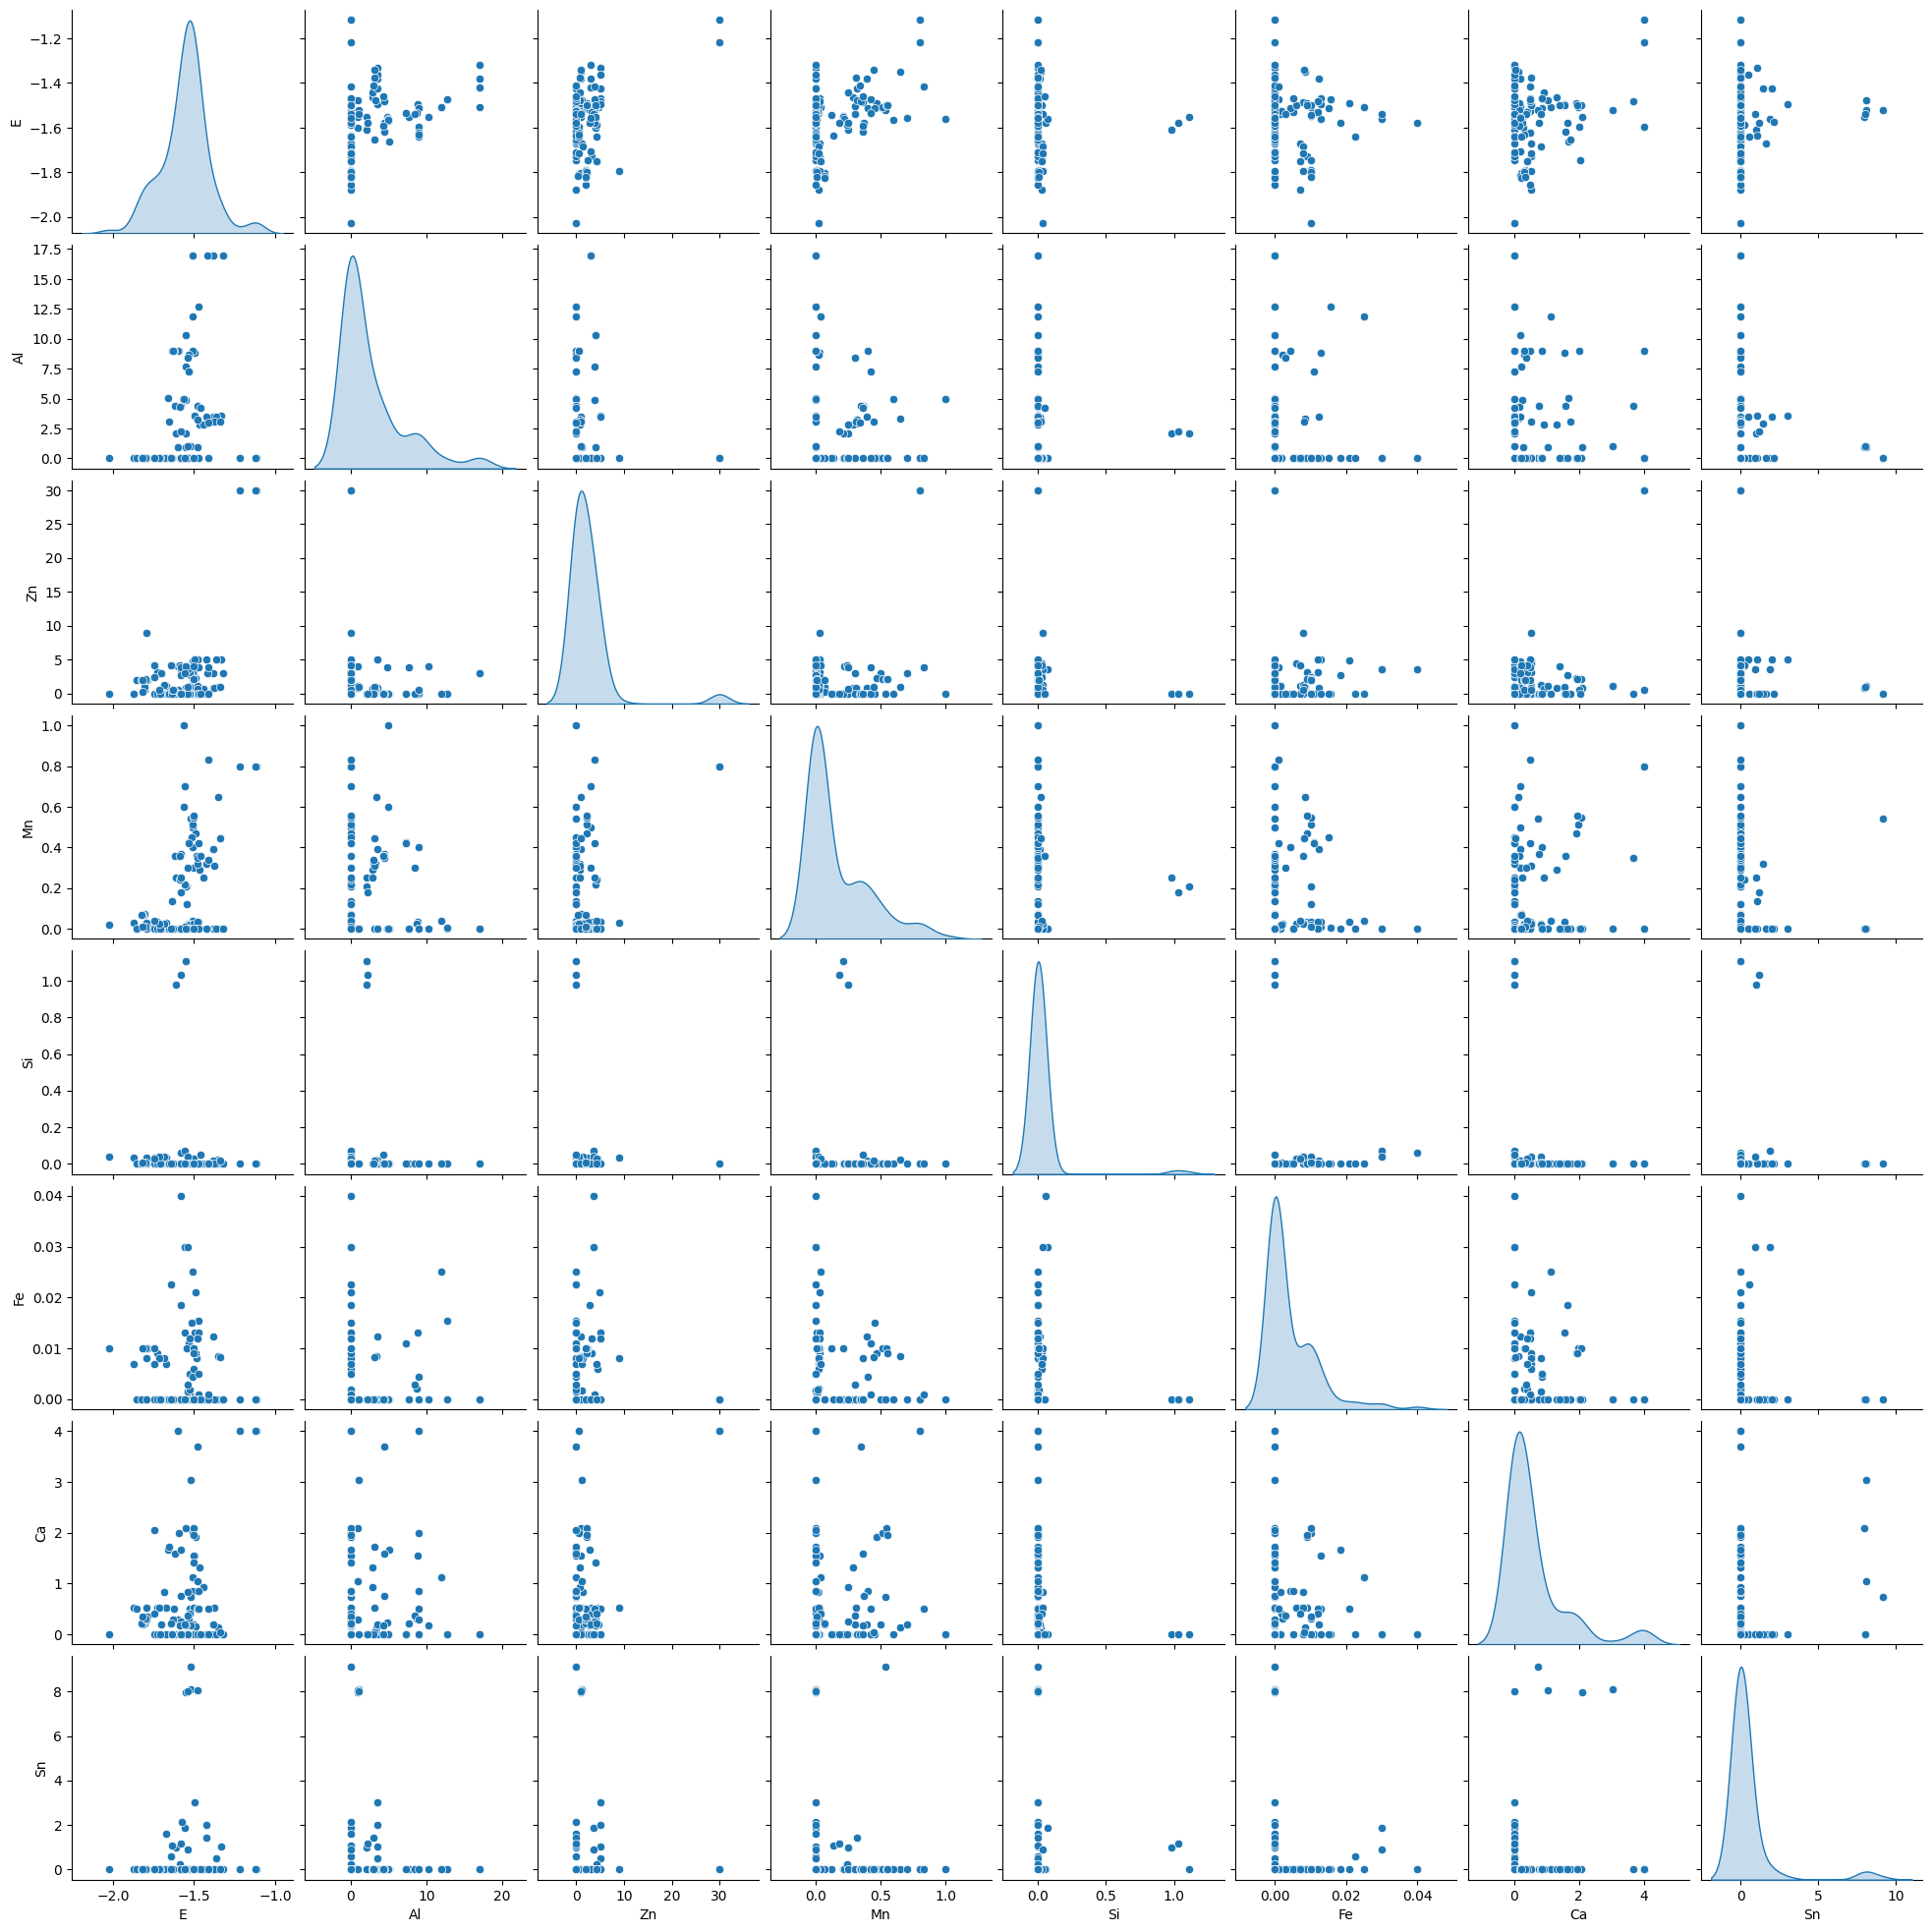

In [ ]:
3

# Split features from labels

Separate the target value—the "label"—from the features. This label is the value that you will train the model to predict.

In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels_E = train_features.pop('E')
test_labels_E = test_features.pop('E')

train_labels_I = train_features.pop('I')
test_labels_I = test_features.pop('I')

# The Normalization layer

The tf.keras.layers.Normalization is a clean and simple way to add feature normalization into your model.

The first step is to create the layer:

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)

Then, fit the state of the preprocessing layer to the data by calling Normalization.adapt:

In [ ]:
normalizer.adapt(np.array(train_features))

Calculate the mean and variance, and store them in the layer:




In [ ]:
print(normalizer.mean.numpy())

[[2.619 2.573 0.161 0.03  0.004 0.609 0.475]]


When the layer is called, it returns the input data, with each feature independently normalized:

In [ ]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[0.96 0.89 0.   0.   0.   2.09 7.95]]

Normalized: [[-0.4  -0.32 -0.68 -0.19 -0.59  1.54  4.52]]


# Linear regression

Before building a deep neural network model, start with linear regression using one and several variables.

#Linear regression with one variable

Begin with a single-variable linear regression to predict 'E' from 'Al'.

Training a model with tf.keras typically starts by defining the model architecture. Use a tf.keras.Sequential model, which represents a sequence of steps.

There are two steps in your single-variable linear regression model:

- Normalize the 'Horsepower' input features using the tf.keras.layers.Normalization preprocessing layer.
- Apply a linear transformation ($ y = mx + b$) to produce 1 output using a linear layer (tf.keras.layers.Dense).

The number of inputs can either be set by the input_shape argument, or automatically when the model is run for the first time.


First, create a NumPy array made of the 'Al' features. Then, instantiate the tf.keras.layers.Normalization and fit its state to the horsepower data:

In [ ]:
Al = np.array(train_features['Al'])

Al_normalizer = layers.Normalization(input_shape=[1,], axis=None)
Al_normalizer.adapt(Al)

Build the Keras Sequential model:

In [ ]:
Al_model = tf.keras.Sequential([
    Al_normalizer,
    layers.Dense(units=1)
])

Al_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


This model will predict 'E' from 'Al'.

Run the untrained model on the first 10 'Al' values. The output won't be good, but notice that it has the expected shape of (10, 1):

In [ ]:
Al_model.predict(Al[:10])

1/1 [==============================] - 0s 55ms/step


array([[-0.516],
       [-0.797],
       [-0.815],
       [ 3.139],
       [ 1.924],
       [ 1.893],
       [ 1.457],
       [ 1.987],
       [-0.815],
       [-0.815]], dtype=float32)

Once the model is built, configure the training procedure using the Keras Model.compile method. The most important arguments to compile are the loss and the optimizer, since these define what will be optimized (mean_absolute_error) and how (using the tf.keras.optimizers.Adam).

In [ ]:
Al_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_absolute_error')

Use Keras Model.fit to execute the training for 100 epochs:

In [ ]:
%%time
history = Al_model.fit(
    train_features['Al'],
    train_labels_E,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 3.95 s, sys: 129 ms, total: 4.08 s
Wall time: 4.17 s


Visualize the model's training progress using the stats stored in the history object:

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.101119,0.100207,95
96,0.101099,0.100274,96
97,0.101099,0.100305,97
98,0.101148,0.100387,98
99,0.101122,0.100398,99


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0.0, 4])
  plt.xlabel('Epoch')
  plt.ylabel('Error [E]')
  plt.legend()
  plt.grid(True)

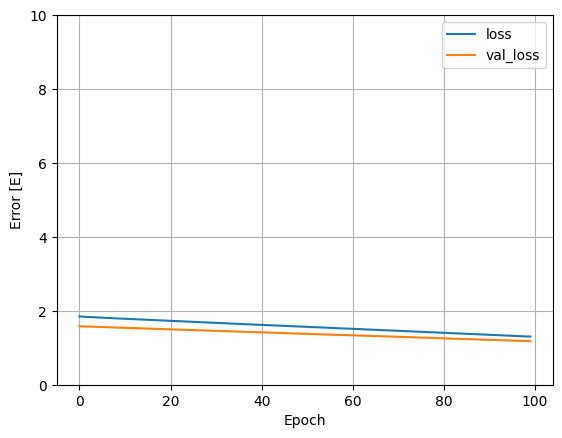

In [ ]:
plot_loss(history)

Collect the results on the test set for later:

In [ ]:
test_results = {}

test_results['Al_model'] = Al_model.evaluate(
    test_features['Al'],
    test_labels_E, verbose=0)

Since this is a single variable regression, it's easy to view the model's predictions as a function of the input:




In [ ]:
x = tf.linspace(0.0, 250, 251)
y = Al_model.predict(x)

8/8 [==============================] - 0s 8ms/step


In [ ]:
def plot_horsepower(x, y):
  plt.scatter(train_features['Al'], train_labels_E, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Al % concentration')
  plt.ylabel('E')
  plt.legend()
  plt.xlim([0,20])
  plt.ylim([-3,-0.5])

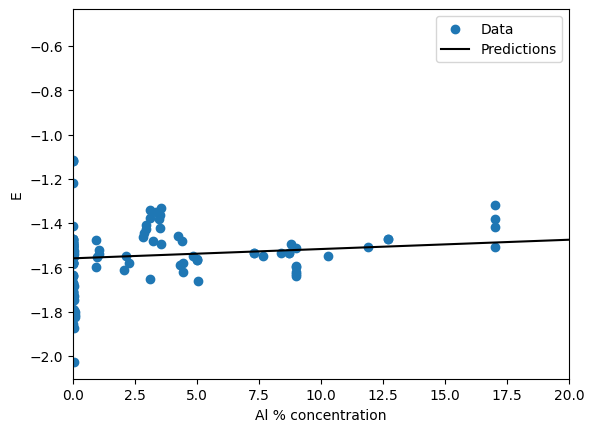

In [ ]:
plot_horsepower(x, y)

# Linear regression with multiple inputs

You can use an almost identical setup to make predictions based on multiple inputs. This model still does the same $y = mx +b$ except that $m$ is a matrix and $x$ is a vector.

Create a two-step Keras Sequential model again with the first layer being normalizer (tf.keras.layers.Normalization(axis=-1)) you defined earlier and adapted to the whole dataset:

In [ ]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

When you call Model.predict on a batch of inputs, it produces units=1 outputs for each example:

In [ ]:
linear_model.predict(train_features[:10])

1/1 [==============================] - 0s 30ms/step


array([[ 4.893],
       [ 0.62 ],
       [-0.891],
       [-1.553],
       [-1.232],
       [-0.911],
       [-2.64 ],
       [-0.263],
       [-0.882],
       [-1.279]], dtype=float32)

When you call the model, its weight matrices will be built—check that the kernel weights (the $m$ in $y = mx + b$) have a shape of (7, 1):

In [ ]:
linear_model.layers[1].kernel

<tf.Variable 'dense_4/kernel:0' shape=(7, 1) dtype=float32, numpy=
array([[-0.777],
       [-0.103],
       [-0.808],
       [ 0.646],
       [-0.422],
       [ 0.295],
       [ 0.758]], dtype=float32)>

Configure the model with Keras Model.compile and train with Model.fit for 100 epocs

In [ ]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_absolute_error')

In [ ]:
%%time
history = linear_model.fit(
    train_features,
    train_labels_E,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 4.94 s, sys: 150 ms, total: 5.09 s
Wall time: 5.68 s


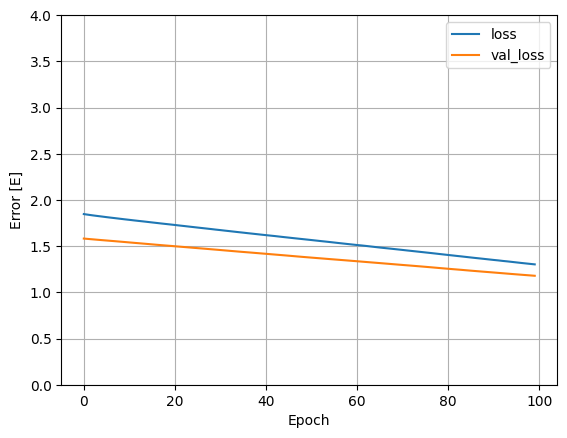

In [ ]:
plot_loss(history)

Collect the results for later

In [ ]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels_E, verbose=0)

# Regression with a deep neural network (DNN)

In the previous section, you implemented two linear models for single and multiple inputs.

Here, you will implement single-input and multiple-input DNN models.

The code is basically the same except the model is expanded to include some "hidden" non-linear layers. The name "hidden" here just means not directly connected to the inputs or outputs.

These models will contain a few more layers than the linear model:

- The normalization layer, as before (with horsepower_normalizer for a single-input model and normalizer for a multiple-input model).
- Two hidden, non-linear, Dense layers with the ReLU (relu) activation function nonlinearity.
- A linear Dense single-output layer.

Both models will use the same training procedure, so the compile method is included in the build_and_compile_model function below.

In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

# Regression using a DNN and a single input

Create a DNN model with only 'Al' as input and horsepower_normalizer (defined earlier) as the normalization layer:




In [ ]:
dnn_Al_model = build_and_compile_model(Al_normalizer)

This model has quite a few more trainable parameters than the linear models:

In [ ]:
dnn_Al_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_11 (Dense)            (None, 64)                128       
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [ ]:
%%time
history = dnn_Al_model.fit(
    train_features['Al'],
    train_labels_E,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 6.09 s, sys: 164 ms, total: 6.25 s
Wall time: 8.07 s


This model does slightly better than the linear single-input horsepower_model:

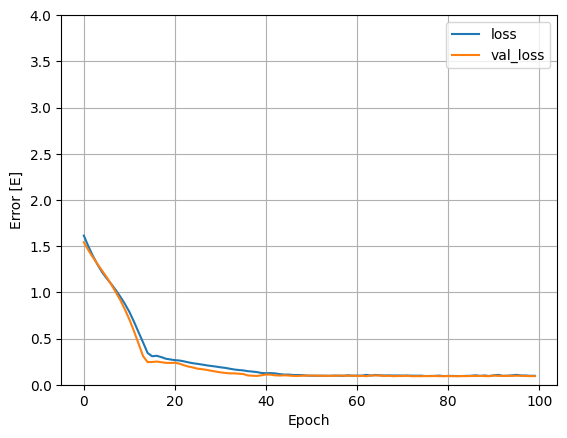

In [ ]:
plot_loss(history)

If you plot the predictions as a function of 'Horsepower', you should notice how this model takes advantage of the nonlinearity provided by the hidden layers:

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = dnn_Al_model.predict(x)

8/8 [==============================] - 0s 7ms/step


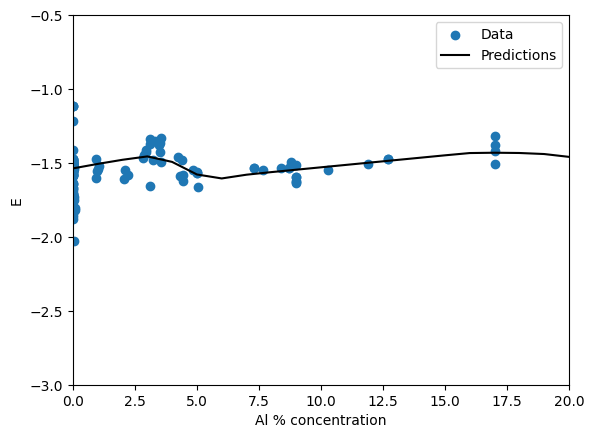

In [ ]:
plot_horsepower(x, y)

Collect the results for later:

In [ ]:
test_results['dnn_Al_model'] = dnn_Al_model.evaluate(
    test_features['Al'], test_labels_E,
    verbose=0)

#Regression using a DNN and multiple inputs

Repeat the previous process using all the inputs. The model's performance slightly improves on the validation dataset.

In [ ]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normalizat  (None, 7)                15        
 ion)                                                            
                                                                 
 dense_14 (Dense)            (None, 64)                512       
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,752
Trainable params: 4,737
Non-trainable params: 15
_________________________________________________________________


In [ ]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels_E,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 6.4 s, sys: 167 ms, total: 6.56 s
Wall time: 12 s


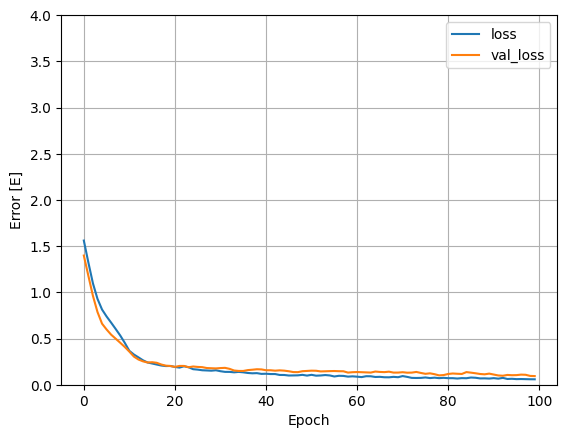

In [ ]:
plot_loss(history)

Collect the results of the test:

In [ ]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels_E, verbose=0)

#Performance

Since all models have been trained, you can review their test set performance:

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
Al_model,0.100487
linear_model,1.192827
dnn_Al_model,0.098700
dnn_model,0.076577


These results match the validation error observed during training.

#Make predictions

You can now make predictions with the dnn_model on the test set using Keras Model.predict and review the loss:

1/1 [==============================] - 0s 23ms/step


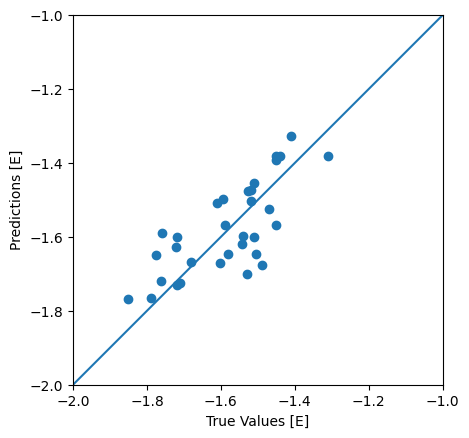

In [ ]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels_E, test_predictions)
plt.xlabel('True Values [E]')
plt.ylabel('Predictions [E]')
lims = [-2, -1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

It appears that the model predicts reasonably well.

Now, check the error distribution:

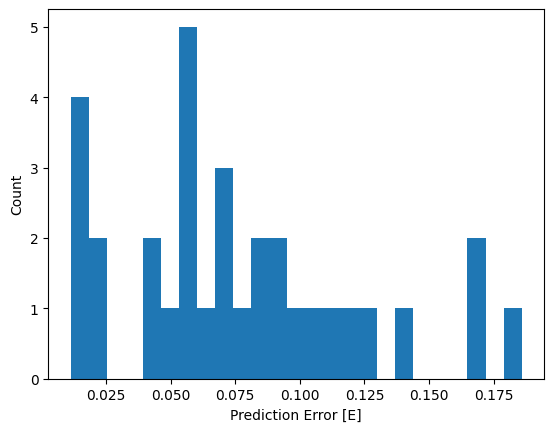

In [ ]:
error = np.abs(test_predictions - test_labels_E)
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [E]')
_ = plt.ylabel('Count')